In [ ]:
DATA_PATH='/content/drive/MyDrive/Colab Notebooks/Chapter 7 - Dynamic Graphs/35'


In [ ]:
import glob
import numpy as np

from IPython.display import HTML
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation



In [ ]:
files = glob.glob(f"{DATA_PATH}/*.npy")
files.sort()
files


['/content/drive/MyDrive/Colab Notebooks/Chapter 7 - Dynamic Graphs/35/edges.npy',
 '/content/drive/MyDrive/Colab Notebooks/Chapter 7 - Dynamic Graphs/35/joint_masks.npy',
 '/content/drive/MyDrive/Colab Notebooks/Chapter 7 - Dynamic Graphs/35/loc_test_cmu.npy',
 '/content/drive/MyDrive/Colab Notebooks/Chapter 7 - Dynamic Graphs/35/loc_train_cmu.npy',
 '/content/drive/MyDrive/Colab Notebooks/Chapter 7 - Dynamic Graphs/35/loc_valid_cmu.npy',
 '/content/drive/MyDrive/Colab Notebooks/Chapter 7 - Dynamic Graphs/35/vel_test_cmu.npy',
 '/content/drive/MyDrive/Colab Notebooks/Chapter 7 - Dynamic Graphs/35/vel_train_cmu.npy',
 '/content/drive/MyDrive/Colab Notebooks/Chapter 7 - Dynamic Graphs/35/vel_valid_cmu.npy']

In [ ]:
for n in range(3):
  pos =  np.load(files[2 + n])
  print(pos.shape)

(27, 100, 31, 3)
(92, 50, 31, 3)
(33, 50, 31, 3)


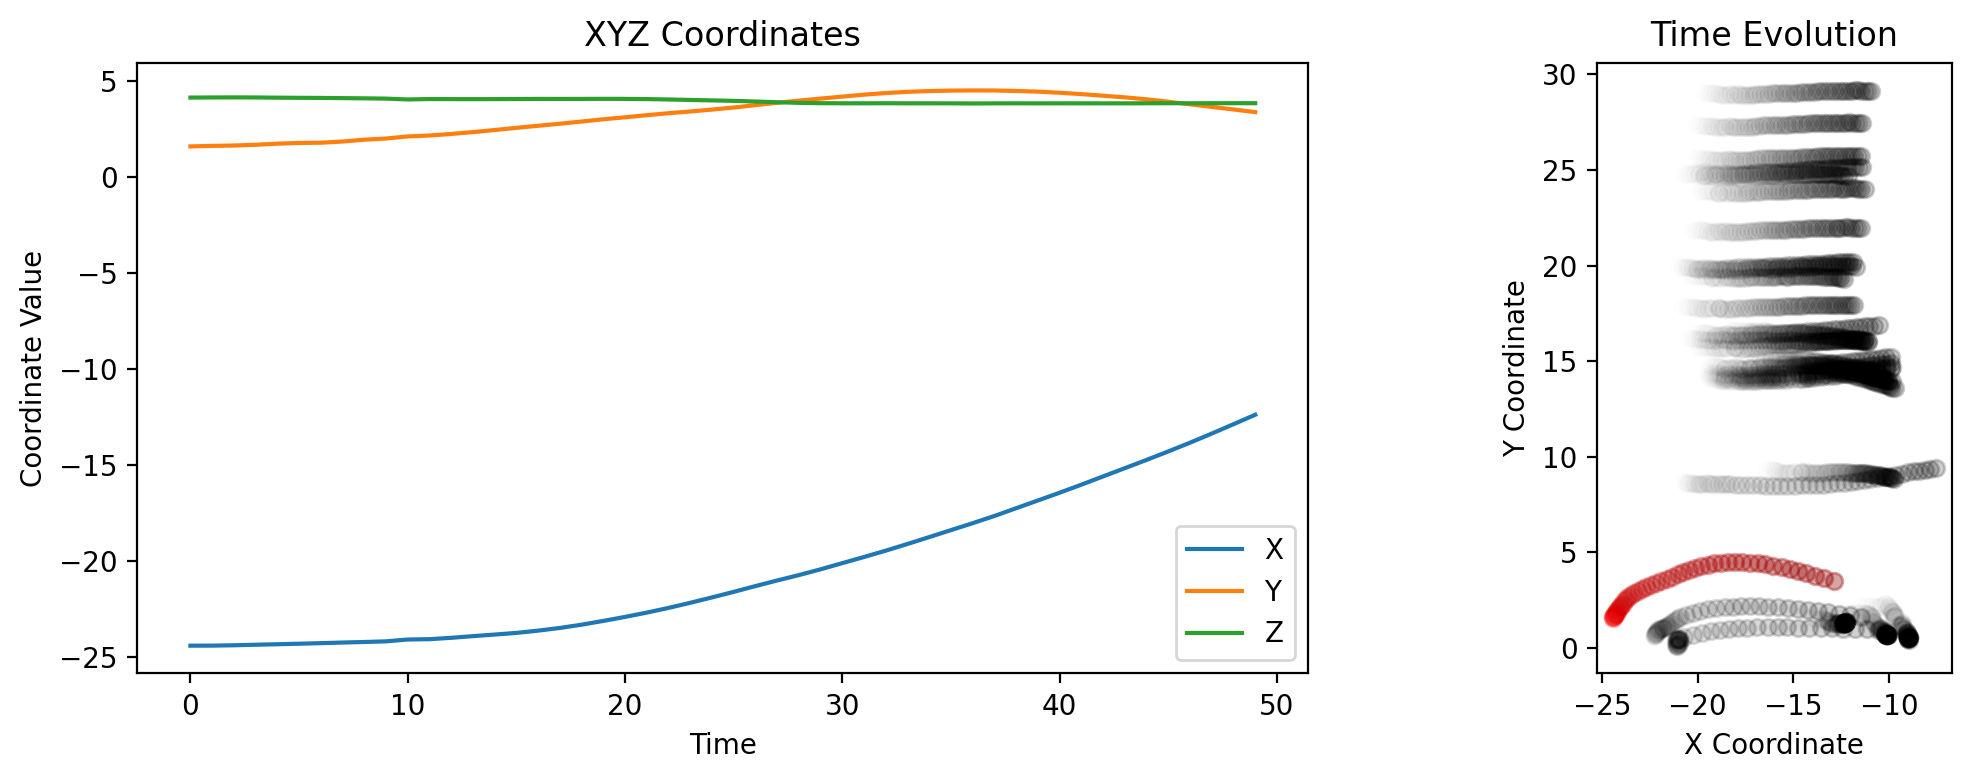

In [ ]:
run = 0
alpha = 0.0  # Initial transparency value
sensor = 8

# XYZ coordinates subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 4), facecolor='white', dpi=200)

# XYZ coordinates for pos
pos = np.load(files[3])[run]
pos[:, :, [2, 0]] = pos[:, :, [0, 2]]
axs[0].plot(pos[:, sensor, :])
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Coordinate Value')
axs[0].set_title('XYZ Coordinates')
axs[0].legend(['X','Y','Z'])

# Time evolution subplot
axs[1].set_aspect('equal')  # Set equal aspect ratio for x and y axes

for t in range(49):
    pos = np.load(files[3])[run][t]
    pos_2d = pos[:, 1:]  # Take only the first two columns (x and y coordinates)
    pos_2d[:, [0, 1]] = pos_2d[:, [1, 0]]

    color = (0, 0, 0, alpha)  # Black color with transparency
    axs[1].plot(pos_2d[:, 0], pos_2d[:, 1], 'o', color=color)
    axs[1].plot(pos_2d[sensor, 0], pos_2d[sensor, 1], 'o', color='r', alpha=0.2)
    alpha += 1.0 / 249  # Gradually decrease the transparency
axs[1].set_xlabel('X Coordinate')
axs[1].set_ylabel('Y Coordinate')
axs[1].set_title('Time Evolution')

plt.tight_layout()
plt.show()


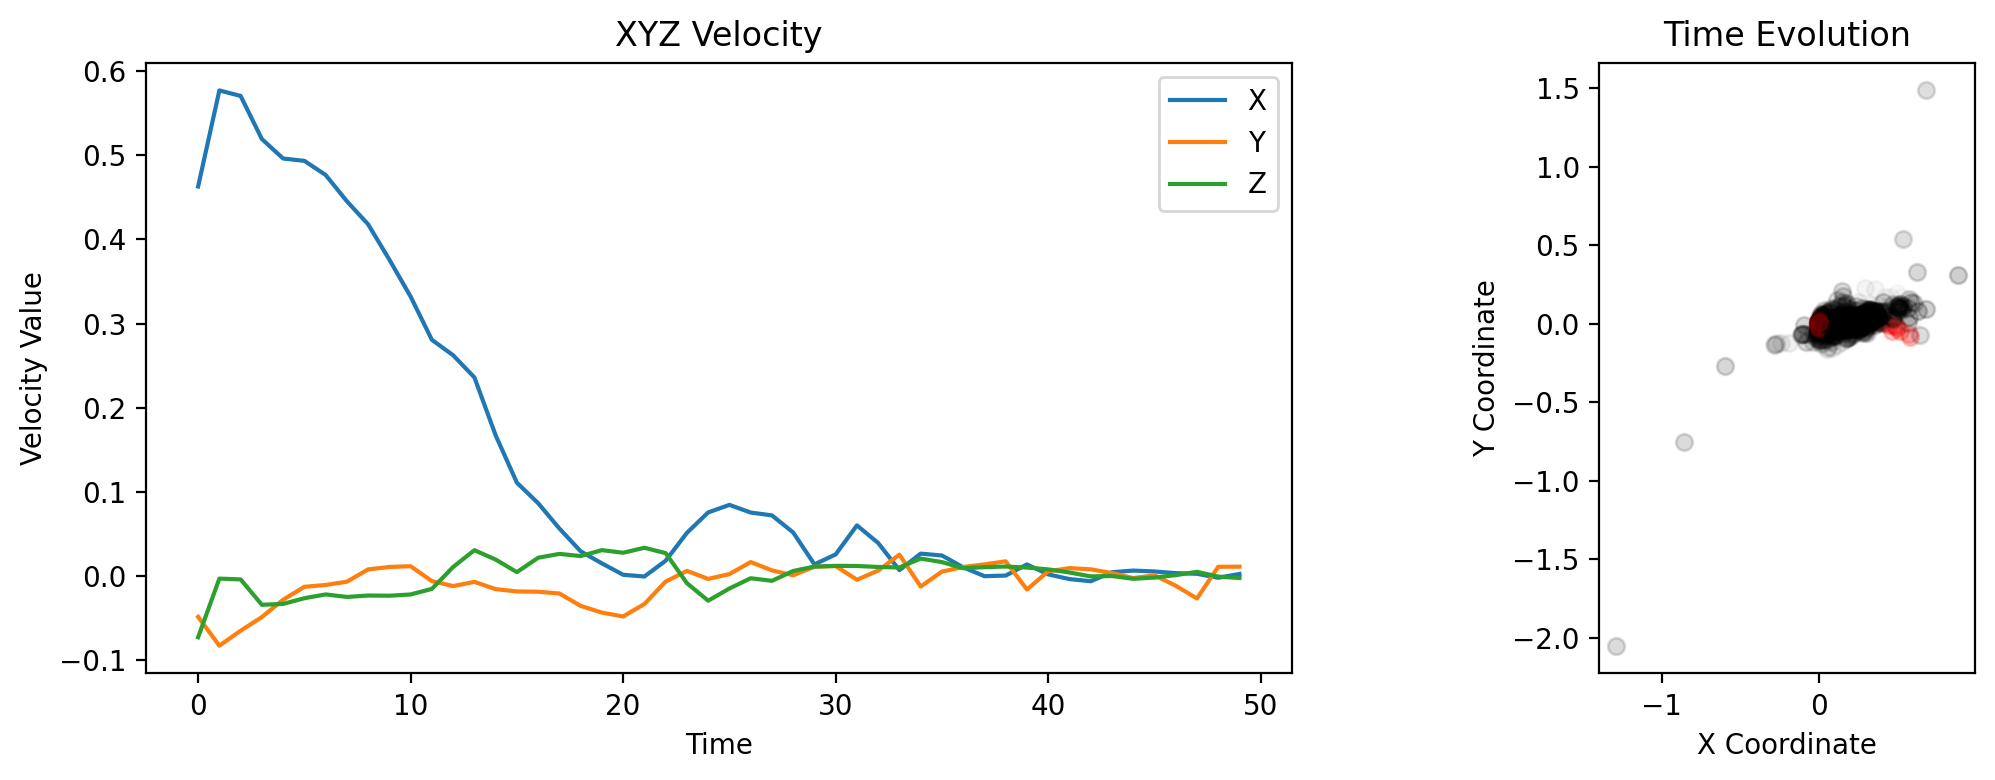

In [ ]:
run = 0
alpha = 0.0  # Initial transparency value
sensor = 8

# XYZ coordinates subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 4), facecolor='white', dpi=200)

# XYZ coordinates for pos
pos = np.load(files[7])[run]
pos[:, :, [2, 0]] = pos[:, :, [0, 2]]
axs[0].plot(pos[:, sensor, :])
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Velocity Value')
axs[0].set_title('XYZ Velocity')
axs[0].legend(['X','Y','Z'])

# Time evolution subplot
axs[1].set_aspect('equal')  # Set equal aspect ratio for x and y axes

for t in range(49):
    pos = np.load(files[7])[run][t]
    pos_2d = pos[:, 1:]  # Take only the first two columns (x and y coordinates)
    pos_2d[:, [0, 1]] = pos_2d[:, [1, 0]]

    color = (0, 0, 0, alpha)  # Black color with transparency
    axs[1].plot(pos_2d[:, 0], pos_2d[:, 1], 'o', color=color)
    axs[1].plot(pos_2d[sensor, 0], pos_2d[sensor, 1], 'o', color='r', alpha=0.2)
    alpha += 1.0 / 249  # Gradually decrease the transparency
axs[1].set_xlabel('X Coordinate')
axs[1].set_ylabel('Y Coordinate')
axs[1].set_title('Time Evolution')

plt.tight_layout()
plt.show()


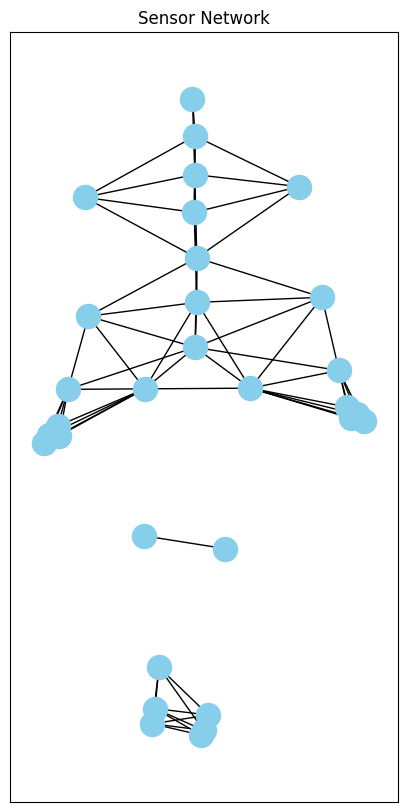

In [ ]:
sensor_data = np.load(files[3])[run][t]

# Set the minimum distance threshold
min_distance = 5  # Adjust this threshold as per your requirements

# Create a graph object
graph = nx.Graph()

# Add nodes to the graph (one node for each sensor)
num_sensors = sensor_data.shape[0]
graph.add_nodes_from(range(num_sensors))

# Connect sensors based on the minimum distance threshold
for i in range(num_sensors):
    for j in range(i+1, num_sensors):
        distance = np.linalg.norm(sensor_data[i] - sensor_data[j])
        if distance <= min_distance:
            graph.add_edge(i, j)

# Visualize the graph using NetworkX
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(111)
# pos = nx.spring_layout(graph)  # Positions of nodes for plotting
nx.draw_networkx_nodes(graph, sensor_data[:, :2], ax=ax, node_color='skyblue')
nx.draw_networkx_edges(graph, sensor_data[:, :2], ax=ax, edge_color='k')

# pos = nx.spring_layout(graph)  # Positions of nodes for plotting
# nx.draw(graph, sensor_data[:, :2], with_labels=True, node_color='skyblue', edge_color='gray')
plt.title('Sensor Network')
plt.show()

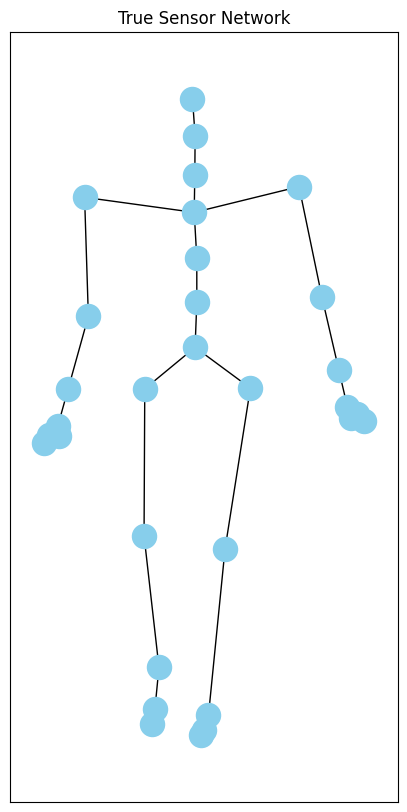

In [ ]:
edges = np.load(files[0])
sensor_data = np.load(files[3])[run][t]

# Set the minimum distance threshold
min_distance = 5  # Adjust this threshold as per your requirements

# Create an empty graph
graph = nx.Graph()

# Add edges to the graph
G.add_edges_from(edges)

# Visualize the graph using NetworkX
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(111)
# pos = nx.spring_layout(graph)  # Positions of nodes for plotting
nx.draw_networkx_nodes(G, sensor_data[:, :2], ax=ax, node_color='skyblue')
nx.draw_networkx_edges(G, sensor_data[:, :2], ax=ax, edge_color='k')

# nx.draw(graph, sensor_data[:, :2], with_labels=True, node_color='skyblue', edge_color='gray')
plt.title('True Sensor Network')
plt.show()

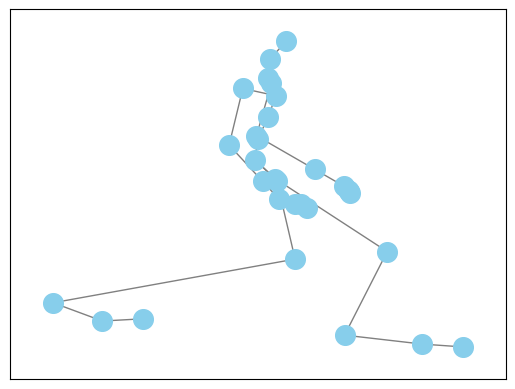

In [ ]:
t = 2
run = 0
edges = np.load(files[0])
pos = np.load(files[3])[t][run]
pos_2d = pos[:, 1:]  # Take only the first two columns (x and y coordinates)
pos_2d[:, [0, 1]] = pos_2d[:, [1, 0]]

fig = plt.figure()
ax = fig.add_subplot(111)

# Create a graph object
G = nx.Graph()

# Add edges to the graph
G.add_edges_from(edges)
# # Plot the graph
# Draw nodes and edges
nx.draw_networkx_nodes(G, pos_2d, ax=ax, node_size=200, node_color='skyblue')
nx.draw_networkx_edges(G, pos_2d, ax=ax, edge_color='gray')

plt.show()

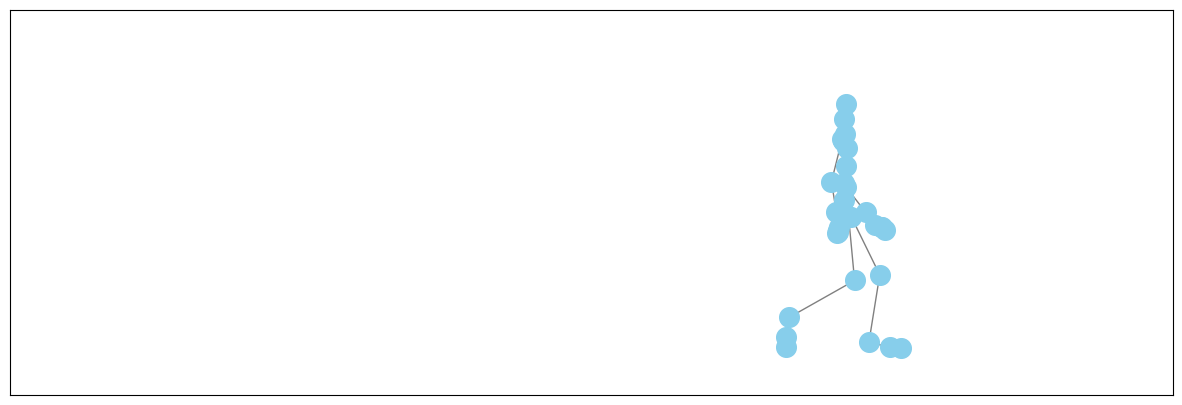

In [ ]:
t = 1
run = 5
edges = np.load(files[0])
pos = np.load(files[3])[run][t]
pos_2d = pos[:, 1:]  # Take only the first two columns (x and y coordinates)
pos_2d[:, [0, 1]] = pos_2d[:, [1, 0]]

fig = plt.figure(figsize=(15,5))s
ax = fig.add_subplot(111)

# Create a graph object
G = nx.Graph()

# Add edges to the graph
G.add_edges_from(edges)

# Initialize empty node and edge collections
node_collection = nx.draw_networkx_nodes(G, pos_2d, ax=ax, node_size=200, node_color='skyblue')
edge_collection = nx.draw_networkx_edges(G, pos_2d, ax=ax, edge_color='gray')
ax.set_ylim(-5,40)
ax.set_xlim(-50,70)
# Function to update the graph animation
def update(frame):
    pos = np.load(files[3])[run][frame]
    pos_2d = pos[:, 1:]  # Take only the first two columns (x and y coordinates)
    pos_2d[:, [0, 1]] = pos_2d[:, [1, 0]]

    # Update node and edge collections
    node_collection.set_offsets(pos_2d)
    edge_collection.set_segments([pos_2d[edge,:] for edge in G.edges()])

    return node_collection, edge_collection

# Create the animation
animation = FuncAnimation(fig, update, frames=range(50), interval=50, blit=True)
HTML(animation.to_jshtml())

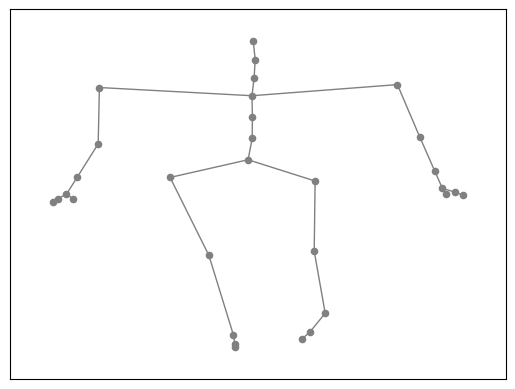

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

edges = np.load(files[0])
pos = np.load(files[3])[run][t]

G = nx.Graph()

# Add edges to the graph
G.add_edges_from(edges)

# # Plot the graph
# Draw nodes and edges
nx.draw_networkx_nodes(G, pos[:, :2], ax=ax, node_size=20, node_color='gray')
nx.draw_networkx_edges(G, pos[:, :2], ax=ax, edge_color='gray')

plt.show()

In [ ]:
np.unique(edges)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])